# Real Estate Clean up

This is a real dataset, and it was downloaded using web scraping techniques. The data contains registers from **Fotocasa** which is one of the most popular real estate websites in Spain. Please, do not do this (web scraping) unless it is for academic purposes.

The dataset was downloaded a few years ago by Henry Navarro, and in no case were economic returns obtained from it.

It contains thousands of data from real houses published on the web www.fotocasa.com. Your goal is to extract as much information as possible with the knowledge you have so far about data science, for example what is the most expensive house in the entire dataset?

Let's start with precisely that question... Good luck!

#### Exercise 00. Read the dataset assets/real_estate.csv and try to visualize the table (★☆☆)

In [117]:
import pandas as pd

# This CSV file contains semicolons instead of comas as separator
ds = pd.read_csv('assets/real_estate.csv', sep=';')

ds.head()


,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN


In [118]:
ds.columns

Index(['Unnamed: 0', 'id_realEstates', 'isNew', 'realEstate_name',
       'phone_realEstate', 'url_inmueble', 'rooms', 'bathrooms', 'surface',
       'price', 'date', 'description', 'address', 'country', 'level1',
       'level2', 'level3', 'level4', 'level5', 'level6', 'level7', 'level8',
       'upperLevel', 'countryId', 'level1Id', 'level2Id', 'level3Id',
       'level4Id', 'level5Id', 'level6Id', 'level7Id', 'level8Id', 'accuracy',
       'latitude', 'longitude', 'zipCode', 'customZone'],
      dtype='object')

In [119]:
ds = ds.isnull().sum()
ds

Unnamed: 0              0
id_realEstates          0
isNew                   0
realEstate_name        10
phone_realEstate      794
url_inmueble            0
rooms                 353
bathrooms             345
surface              1250
price                   0
date                    0
description           142
address                 0
country                 0
level1                  0
level2                  0
level3                  0
level4               6643
level5                  0
level6              14627
level7               2277
level8               8579
upperLevel              0
countryId               0
level1Id                0
level2Id                0
level3Id                0
level4Id                0
level5Id                0
level6Id                0
level7Id                0
level8Id                0
accuracy                0
latitude                0
longitude               0
zipCode             15335
customZone          15335
dtype: int64

In [125]:
ds= ds.drop([ 'level1Id', 'level2Id', 'level3Id','level4Id', 'level5Id', 'level6Id', 'level7Id', 'level8Id','zipCode', 'customZone'], errors = 'ignore')
ds

Unnamed: 0              0
id_realEstates          0
isNew                   0
realEstate_name        10
phone_realEstate      794
url_inmueble            0
rooms                 353
bathrooms             345
surface              1250
price                   0
date                    0
description           142
address                 0
country                 0
level1                  0
level2                  0
level3                  0
level4               6643
level5                  0
level6              14627
level7               2277
level8               8579
upperLevel              0
countryId               0
accuracy                0
latitude                0
longitude               0
dtype: int64

#### Exercise 01. Which is the most expensive house in the dataset? (★☆☆)

Print the address and the price of the selected house. For example:

`The house with address General Street Nº5 is the most expensive and its price is 5000000 USD`

In [121]:

exp = ds["price"].max()
exp_index = ds['price'].idxmax()
column_number = ds.columns.get_loc('address')

print(f"The house located at {ds.iloc[exp_index, column_number]} is the most expensive and it's price is {exp} USD")

AttributeError: 'numpy.int64' object has no attribute 'idxmax'

#### Exercise 02. Which is the cheapest house in the dataset? (★☆☆)

Print the address and the price of the selected house. For example:

`The house with address Concrete Street Nº1 is the cheapest and its price is 12000 USD`

In [122]:

cheapest = ds[ds["price"] != 0]["price"].min()
indices = ds.index[ds["price"] == cheapest]
addre = ds.loc[indices[0], "address"]

print(f"The house with address {addre} is the cheapest and its price is {cheapest} USD")


KeyError: np.False_

#### Exercise 03. Which is the biggest and the smallest house in the dataset? (★☆☆)

Print both the address and the surface of the selected houses. For example:

`The biggest house is located on Yukka Street Nº10 and its surface is 5000 meters`

`The smallest house is located on County Road 1 N and its surface is 200 meters`

In [123]:

#indices = ds.index[ds["surface"] == 249000].tolist()
#print(indices)

#### Exercise 04. How many populations (level5 column) the dataset contains? (★☆☆)



Print the names of the populations with a comma as a separator. For example:

`> print(populations)`

`population1, population2, population3, ...`

In [124]:

nan = ds["level5"].isna().any()

zero = (ds["level5"] == 0).any()
#there are no NAN or "0"
list_pop = len(ds["level5"]) 

print(f' There are {list_pop} populations in this dataset: {list(ds["level5"])}' )


AttributeError: 'numpy.int64' object has no attribute 'isna'

#### Exercise 05. Does the dataset contain NAs? (★☆☆)

Print a boolean value (`True` or `False`) followed by the rows/cols that contains NAs.

In [ ]:
nas = ds.isna().any()
#checking the columns for NAs
print(nas)


False


In [ ]:
nas_index = ds.isna().any(axis=1)
#checking the indexes for NAs
print(nas_index)


ValueError: No axis named 1 for object type Series

#### Exercise 06. Delete the NAs of the dataset, if applicable (★★☆)

Print a comparison between the dimensions of the original DataFrame versus the DataFrame after the deletions.

In [ ]:
print(ds.shape)
#original = ds.shape
#print("Original Dataframe : ")
#print(original)
#print()
#after = ds.dropna()
#cleaned = after.shape
#print("After Dataframe")
#
#print(cleaned)


(27,)


#### Exercise 07. Which is the mean of prices in the population (level5 column) of "Arroyomolinos (Madrid)"? (★★☆)

Print the obtained value.

In [ ]:
import pandas as pd
ds = pd.read_csv('assets/real_estate.csv', sep=';')
value = ds[ds['level5'] == 'Arroyomolinos (Madrid)']
medium_price = value["price"].median()
print(medium_price)

289000.0


#### Exercise 08. Plot the histogram of prices for the population (level5 column) of "Arroyomolinos (Madrid)" and explain what you observe (★★☆)

Print the histogram of the prices and write in the Markdown cell a brief analysis about the plot.

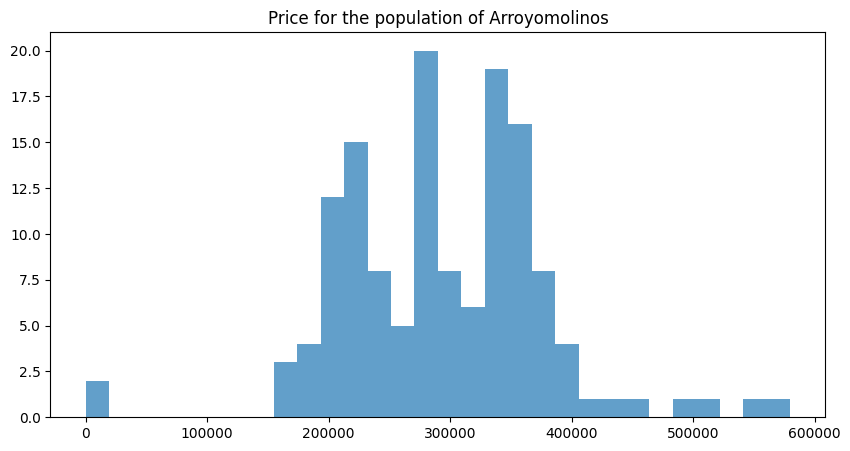

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
ds = pd.read_csv('assets/real_estate.csv', sep=';')
value = ds[ds['level5'] == 'Arroyomolinos (Madrid)']
hist_value = value["price"]



data = hist_value

plt.figure(figsize = (10, 5))

plt.hist(data, bins = 30, alpha = 0.7)

plt.title("Price for the population of Arroyomolinos")
plt.show()

We can see that the majority of the prices are between 170000 to 400000. It shows that there are good oportunity of prices for most of people.

#### Exercise 09. Are the average prices of "Valdemorillo" and "Galapagar" the same? (★★☆)

Print both average prices and then write a conclusion about them.

In [ ]:
import pandas as pd
ds = pd.read_csv('assets/real_estate.csv', sep=';')
city = ds[ds["level5"] == "Valdemorillo"]
aver = city["price"].median()
print(f" The average price in Valdermorillo is {aver} USD")

city1 = ds[ds["level5"] == "Galapagar"]
aver1 = city1["price"].median()
print(f" The average price of Galapagar is {aver1} USD ")
#conclusion
print(" The average price in Galapagar is higher")

 The average price in Valdermorillo is 324500.0 USD
 The average price of Galapagar is 350000.0 USD 
 The average price in Galapagar is higher


#### Exercise 10. Are the average prices per square meter (price/m2) of "Valdemorillo" and "Galapagar" the same? (★★☆)

Print both average prices and then write a conclusion about it.

Hint: Create a new column called `pps` (price per square meter) and then analyze the values.

In [ ]:
import pandas as pd
ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds["pps"] = ds["price"] / ds["surface"]


city = ds[ds["level5"] == "Valdemorillo"]
aver = city["pps"].mean()
print(f" The average price per square meter in Valdermorillo is {aver} USD")

city1 = ds[ds["level5"] == "Galapagar"]
aver1 = city1["pps"].median()
print(f" The average price per square meter in Galapagar is {aver1} USD ")
#Conclusion
print(" In conclusion, the average price per square meter in Galapagar is higher than in Valdermorillo")


 The average price per square meter in Valdermorillo is 1317.9502109024986 USD
 The average price per square meter in Galapagar is 1514.9253731343283 USD 
 In conclusion, the average price per square meter in Galapagar is higher than in Valdermorillo


#### Exercise 11. Analyze the relation between the surface and the price of the houses (★★☆)

Hint: You can make a `scatter plot`, then write a conclusion about it.

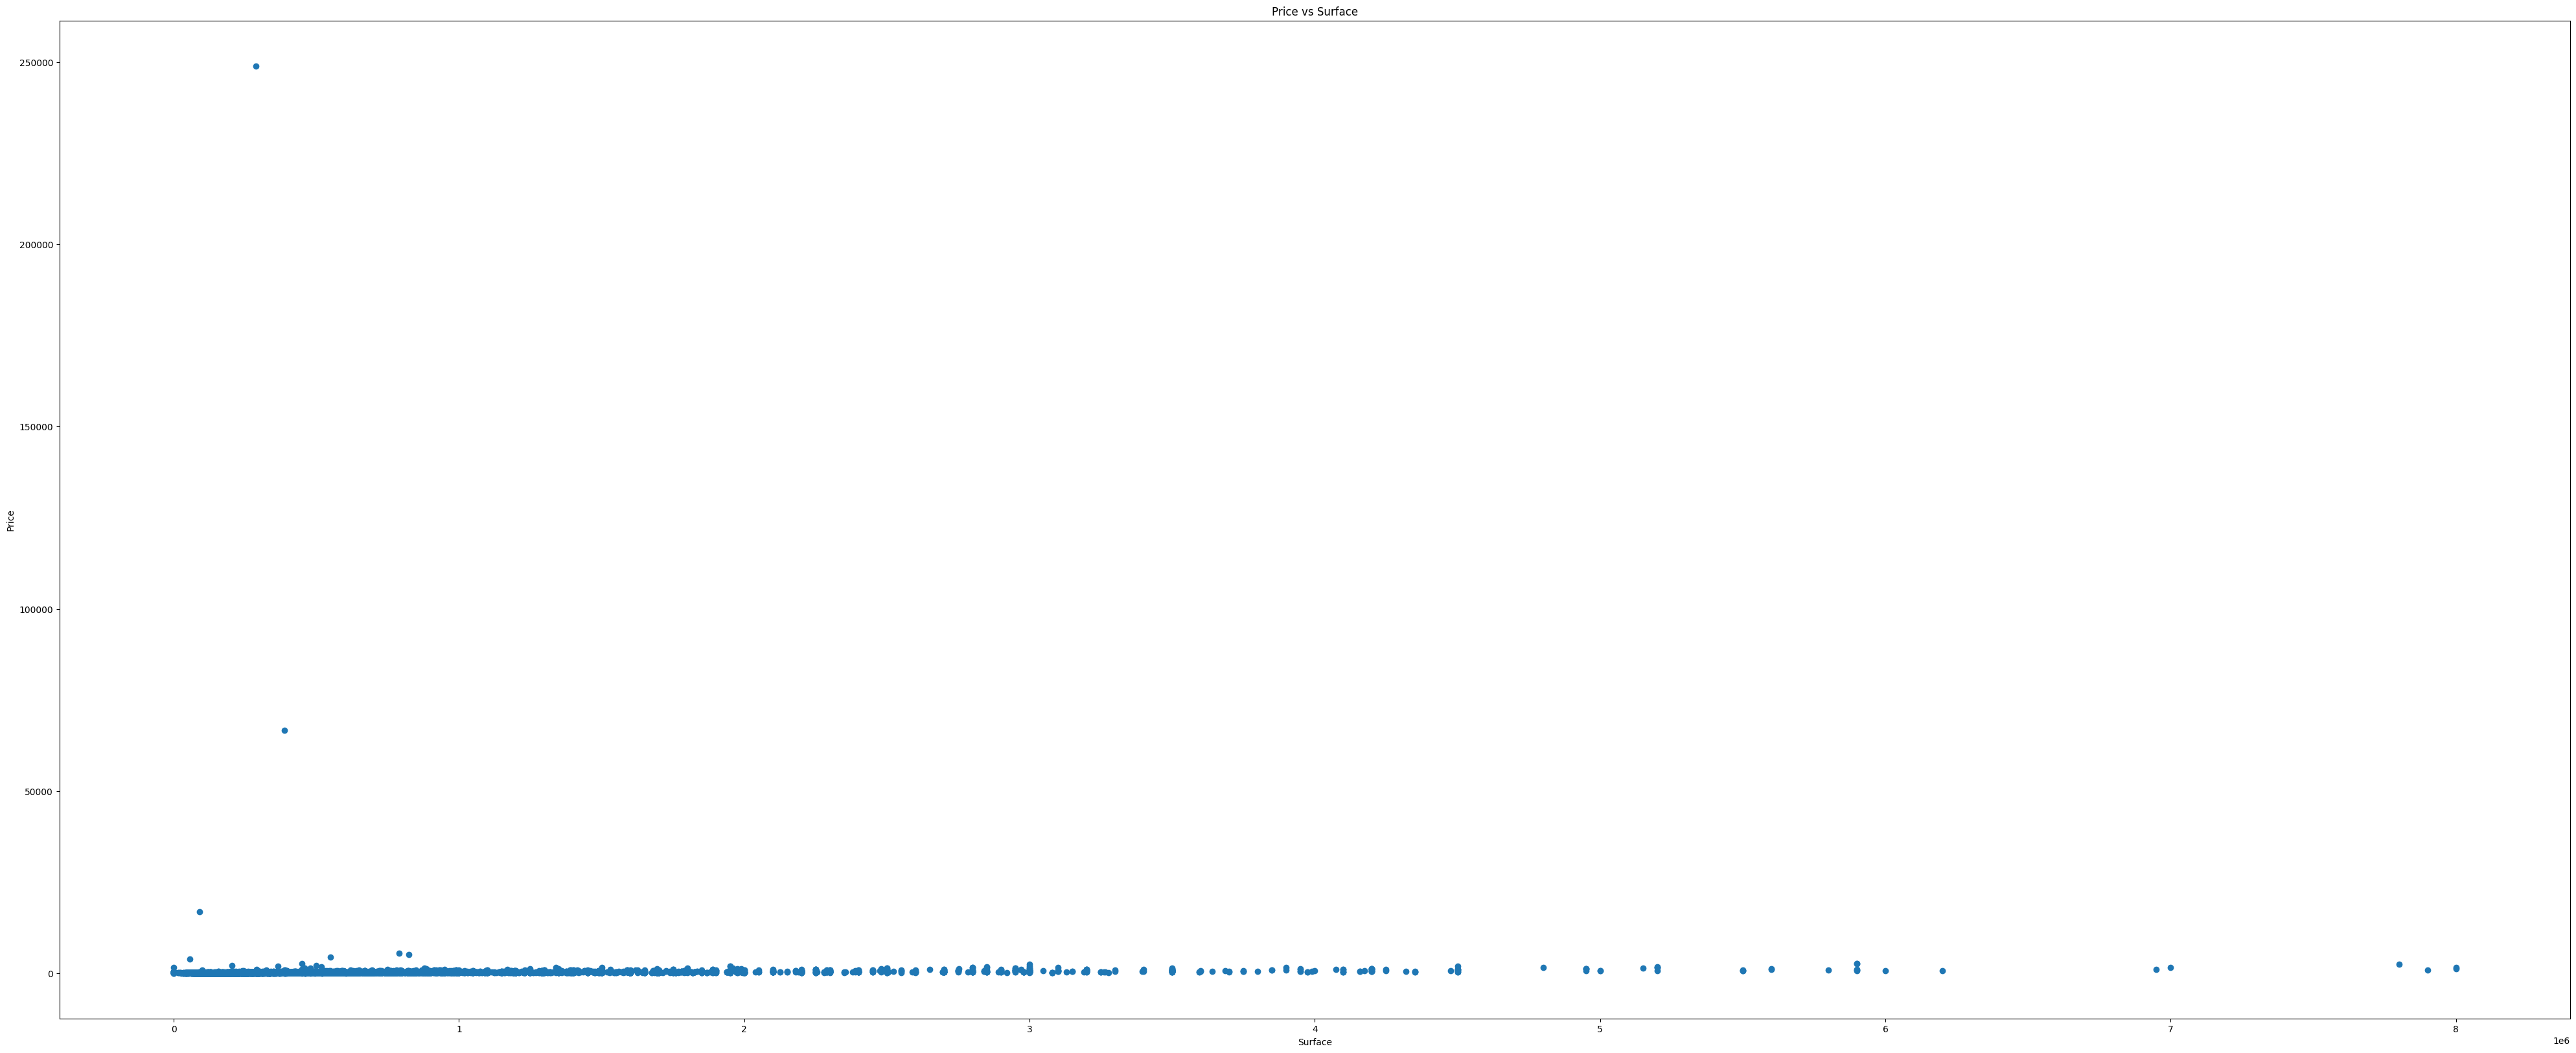

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

ds = pd.read_csv('assets/real_estate.csv', sep=';')

y = ds["surface"]
x = ds["price"]

plt.figure(figsize = (50, 20))

plt.scatter(x, y)

plt.title("Price vs Surface")
plt.xlabel("Surface")  
plt.ylabel("Price") 
plt.show()

The majority of the houses are in equilibrium. You may find more expensive houses but smallers and bigger houses, cheaper.

#### Exercise 12. How many real estate agencies does the dataset contain? (★★☆)

Print the obtained value.

In [ ]:
import pandas as pd
ds = pd.read_csv('assets/real_estate.csv', sep=';')
uniq = ds["realEstate_name"].nunique()

print(uniq)

1821


#### Exercise 13. Which is the population (level5 column) that contains the most houses? (★★☆)

Print both the population and the number of houses.

In [ ]:
import pandas as pd
ds = pd.read_csv('assets/real_estate.csv', sep=';')
most = ds["level5"].value_counts()
#print(most)
houses = most.head(1)
#print(houses)
#print(most.head(1))

print()
print(f'Population: {houses.index[0]} , numbers of houses: {houses.values[0]} ')


Population:  Madrid Capital , numbers of houses: 6643 


#### Exercise 14. Now let's work with the "south belt" of Madrid. Make a subset of the original DataFrame that contains the following populations (level5 column): "Fuenlabrada", "Leganés", "Getafe", "Alcorcón" (★★☆)

Hint: Filter the original DataFrame using the column `level5` and the function `isin`.

In [ ]:
import pandas as pd
ds = pd.read_csv('assets/real_estate.csv', sep=';')

city = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón" ]
south_belt = ds[ds["level5"].isin(city)]

south_belt

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
85,86,153152077,False,sinergical inmobiliaria,NaN,https://www.fotocasa.es/es/comprar/vivienda/le...,1.0,1.0,50.0,107000,...,0,0,0,0,0,1,"40,35059","-3,82693",NaN,NaN
94,95,153995577,False,viviendas365com,911226014.0,https://www.fotocasa.es/es/comprar/vivienda/le...,3.0,2.0,120.0,320000,...,0,0,0,0,0,0,"40,31933","-3,77574",NaN,NaN
109,110,153586414,False,area uno asesores inmobiliarios,912664081.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,3.0,142.0,425000,...,0,0,0,0,0,0,"40,3313411","-3,8313868",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15275,15276,153903887,False,aliseda servicios de gestion inmobiliaria,911368198.0,https://www.fotocasa.es/es/comprar/vivienda/al...,3.0,1.0,78.0,138000,...,0,0,0,0,0,1,"40,31381","-3,83733",NaN,NaN
15291,15292,151697757,False,unipiso,912788631.0,https://www.fotocasa.es/es/comprar/vivienda/al...,3.0,2.0,110.0,279000,...,0,0,0,0,0,0,"40,3259051","-3,76318",NaN,NaN
15305,15306,153902389,False,jadein ferrero,914871639.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,85.0,170000,...,0,0,0,0,0,0,"40,2882193","-3,8098617",NaN,NaN
15322,15323,153871864,False,gestion comercial,911220662.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,91.0,112000,...,0,0,0,0,0,0,"40,28282","-3,78892",NaN,NaN


#### Exercise 15. Make a bar plot of the median of the prices and explain what you observe (you must use the subset obtained in Exercise 14) (★★★)

Print the bar of the median of the prices and write in the Markdown cell a brief analysis about the plot.

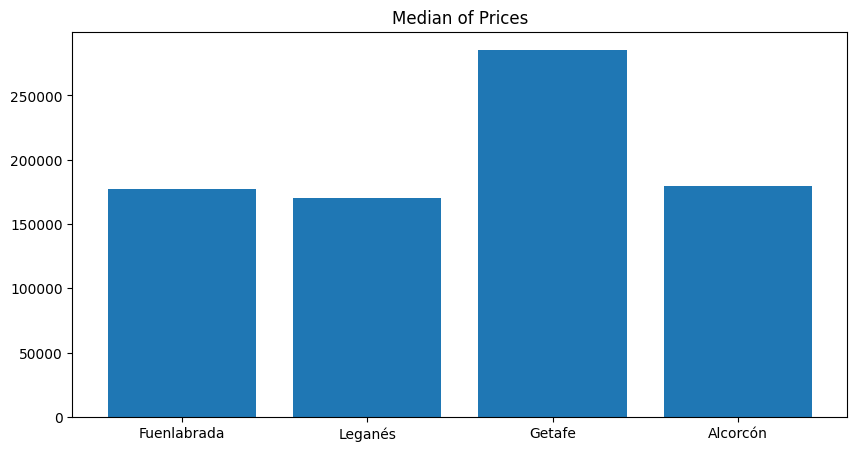

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

ds = pd.read_csv('assets/real_estate.csv', sep=';')

city = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón" ]
south_belt = ds[ds["level5"].isin(city)]

first = south_belt[south_belt["level5"] == "Fuenlabrada"]
median_first = first["price"].mean()

second = south_belt[south_belt["level5"] == "Leganés"]
median_second = second["price"].median()

third = south_belt[south_belt["level5"] == "Getafe"]
median_third = third["price"].median()

fourth = south_belt[south_belt["level5"] == "Alcorcón"]
median_fourth = fourth["price"].median()

labels = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón" ]
values = [median_first, median_second, median_third, median_fourth]

plt.figure(figsize = (10,5))
plt.bar(labels, values)
plt.title("Median of Prices")
plt.show()









We can observe in this graph that the most expensive area on the Salth belt of Madrid is th Getafe. The other areas in the graph have a similar average price.

#### Exercise 16. Calculate the sample mean and variance of the variables: price, rooms, surface area and bathrooms (you must use the subset obtained in Exercise 14) (★★★)

Print both values for each variable.

In [ ]:
import pandas as pd


ds = pd.read_csv('assets/real_estate.csv', sep=';')

city = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón" ]
south_belt = ds[ds["level5"].isin(city)]

print("Mean values in Fuenlabrada")
first = south_belt[south_belt["level5"] == "Fuenlabrada"]
median_first = first[["price", "rooms", "surface", "bathrooms"] ].mean()
median_first1 = first[["price", "rooms", "surface", "bathrooms"] ].var()
print(median_first)
print()
print("Variance values in Fuenlabrada")
print(median_first1)
print()
print("Mean values in Leganés")
second = south_belt[south_belt["level5"] == "Leganés"]
median_second = second[["price", "rooms", "surface", "bathrooms"] ].mean()
median_second1 = second[["price", "rooms", "surface", "bathrooms"] ].var()
print(median_second)
print()
print("Variance values in Leganés")
print(median_second1)
print()
print("Mean values in Getafe")
third = south_belt[south_belt["level5"] == "Getafe"]
median_third = third[["price", "rooms", "surface", "bathrooms"]].median()
median_third1 = third[["price", "rooms", "surface", "bathrooms"] ].var()
print(median_third)
print()
print("Variance values in Getafe")
print(median_third1)
print()
print("Mean values in Alcorcón")
fourth = south_belt[south_belt["level5"] == "Alcorcón"]
median_fourth = fourth[["price", "rooms", "surface", "bathrooms"]].median()
median_fourth1 = fourth[["price", "rooms", "surface", "bathrooms"]].var()
print(median_fourth)
print()
print("Variance values in Alcorcón")
print(median_fourth1)
print()


Mean values in Fuenlabrada
price        177198.021459
rooms             3.025974
surface         103.624365
bathrooms         1.445415
dtype: float64

Variance values in Fuenlabrada
price        4.701021e+09
rooms        3.558442e-01
surface      2.264644e+03
bathrooms    3.533670e-01
dtype: float64

Mean values in Leganés
price        208682.010309
rooms             2.906736
surface         105.852273
bathrooms         1.518135
dtype: float64

Variance values in Leganés
price        1.191394e+10
rooms        8.245898e-01
surface      3.987475e+03
bathrooms    5.530548e-01
dtype: float64

Mean values in Getafe
price        285305.0
rooms             3.0
surface         116.0
bathrooms         2.0
dtype: float64

Variance values in Getafe
price        2.098267e+10
rooms        7.727479e-01
surface      5.828110e+03
bathrooms    6.588091e-01
dtype: float64

Mean values in Alcorcón
price        179500.0
rooms             3.0
surface          85.0
bathrooms         1.0
dtype: float64

Vari

#### Exercise 17. What is the most expensive house in each population? You must use the subset obtained in Exercise 14 (★★☆)

Print both the address and the price of the selected house of each population. You can print a DataFrame or a single line for each population.

In [ ]:
import pandas as pd
ds = pd.read_csv('assets/real_estate.csv', sep=';')

city = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón" ]
south_belt = ds[ds["level5"].isin(city)]

first = south_belt[south_belt["level5"] == "Fuenlabrada"]
most_exp = first["price"].max()

second = south_belt[south_belt["level5"] == "Leganés"]
most_exp2 = second["price"].max()

third = south_belt[south_belt["level5"] == "Getafe"]
most_exp3 = third["price"].max()

fourth = south_belt[south_belt["level5"] == "Alcorcón"]
most_exp4 = fourth["price"].max()

most_expensive = {
    "Fuenlabrada": most_exp, 
    "Leganés" : most_exp2, 
    "Getafe"  : most_exp3,
    "Alcorcón" : most_exp4
}
dataframe = pd.DataFrame(most_expensive, index = ["prices"])
dataframe

,Fuenlabrada,Leganés,Getafe,Alcorcón
prices,490000,650000,1050000,950000


#### Exercise 18. Normalize the variable of prices for each population and plot the 4 histograms in the same plot (you must use the subset obtained in Exercise 14) (★★★)

For the normalization method, you can use the one you consider; there is not a single correct answer to this question. Print the plot and write in the Markdown cell a brief analysis about the plot.

Hint: You can help yourself by reviewing the multihist demo of matplotlib.

[1.0199501246882794, 0.371571072319202, 0.571072319201995, 0.8653366583541147, 1.1945236907730674, 0.8428927680798005, 0.6458852867830424, 0.4775561097256858, 0.8042394014962594, 1.4064837905236909, 1.1945137157107233, 1.43142144638404, 0.5187032418952618, 0.4613466334164589, 0.5411221945137157, 0.6608478802992519, 1.1945236907730674, 1.3139650872817956, 0.6458852867830424, 0.7206982543640897, 1.1296758104738154, 1.0, 1.0, 1.1172069825436408, 0.5286783042394015, 0.5566084788029925, 0.5334164588528678, 1.4364089775561097, 1.3316708229426435, 0.9576059850374065, 0.4912718204488778, 0.5336658354114713, 0.5458852867830424, 0.6556109725685786, 1.0199501246882794, 0.5566084788029925, 0.6458852867830424, 0.600997506234414, 0.5882793017456359, 0.5411471321695761, 1.1820448877805487, 0.6206982543640898, 1.057356608478803, 0.8703241895261845, 1.2194513715710724, 0.9177057356608479, 0.7942643391521197, 0.5760598503740648, 1.1371571072319202, 0.6583541147132169, 0.43341645885286784, 0.670822942643

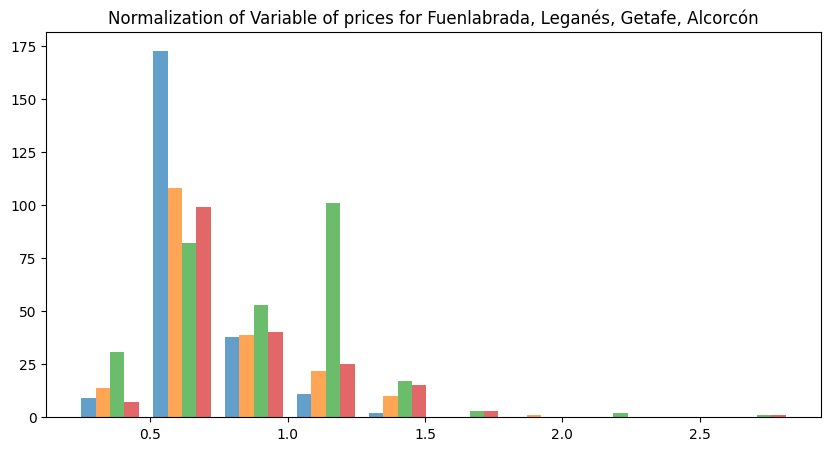

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

ds = pd.read_csv('assets/real_estate.csv', sep=';')

city = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón" ]
south_belt = ds[ds["level5"].isin(city)]
####################################Fuenlabrada#############################
city_data = south_belt[south_belt["level5"] == "Fuenlabrada" ]
price = city_data["price"]
min = city_data["price"].min()
max = city_data["price"].max()

new_price = list(price)

normalized = [(i + min)/(max - min) for i in new_price]
#print(normalized)
#This convertion to numbers got from chat GPT
df1 = pd.DataFrame(normalized, columns=['values'])  

# Filter only numeric values  
numbers_only = df1['values'].apply(lambda x: isinstance(x, (int, float, np.float64)))  

# Extract the numeric values  
numeric_values_fuenlabrada = df1[numbers_only]['values'].tolist()  
####################################Leganés#############################
city_datal = south_belt[south_belt["level5"] == "Leganés" ]
pricel = city_datal["price"]
minl = city_datal["price"].min()
maxl = city_datal["price"].max()

new_pricel = list(pricel)

normalizedl = [(i + min)/(max - min) for i in new_pricel]
#print(normalized)
#This convertion to numbers got from chat GPT
df1l = pd.DataFrame(normalizedl, columns=['values'])  

# Filter only numeric values  
numbers_onlyl = df1l['values'].apply(lambda x: isinstance(x, (int, float, np.float64)))  

# Extract the numeric values  
numeric_values_leganes = df1l[numbers_onlyl]['values'].tolist()  
print(numeric_values_leganes)

############################################"Getafe"##################################
city_datag = south_belt[south_belt["level5"] == "Getafe" ]
priceg = city_datag["price"]
ming = city_datag["price"].min()
maxg = city_datag["price"].max()

new_priceg = list(priceg)

normalizedg = [(i + min)/(max - min) for i in new_priceg]
#print(normalized)
#This convertion to numbers got from chat GPT
df1g = pd.DataFrame(normalizedg, columns=['values'])  

# Filter only numeric values  
numbers_onlyg = df1g['values'].apply(lambda x: isinstance(x, (int, float, np.float64)))  

# Extract the numeric values  
numeric_values_getafe = df1g[numbers_onlyg]['values'].tolist()  
print(numeric_values_getafe)
#####################################Alcorcón#########################################

city_dataa = south_belt[south_belt["level5"] == "Alcorcón" ]
pricea = city_dataa["price"]
mina = city_dataa["price"].min()
maxa = city_dataa["price"].max()

new_pricea = list(pricea)

normalizeda = [(i + min)/(max - min) for i in new_pricea]
#print(normalized)
#This convertion to numbers got from chat GPT
df1a = pd.DataFrame(normalizeda, columns=['values'])  

# Filter only numeric values  
numbers_onlya = df1a['values'].apply(lambda x: isinstance(x, (int, float, np.float64)))  

# Extract the numeric values  
numeric_values_alcorcon = df1a[numbers_onlya]['values'].tolist()  
print(numeric_values_alcorcon)
######################################################################################

data = [numeric_values_fuenlabrada , numeric_values_leganes, numeric_values_getafe, numeric_values_alcorcon]



plt.figure(figsize = (10, 5))

plt.hist(data, bins = 10, alpha = 0.7)

plt.title("Normalization of Variable of prices for Fuenlabrada, Leganés, Getafe, Alcorcón")
#["Fuenlabrada", "Leganés", "Getafe", "Alcorcón" ]
plt.show()

we can see that the Fuenlabrada have more accessible houses and Getafe have more options for more expensive houses. But even oon the most expensive city, there are afordable houses. 

#### Exercise 19. What can you say about the price per square meter (price/m2) between the towns of "Getafe" and "Alcorcón"? You must use the subset obtained in Exercise 14 (★★☆)

Hint: Create a new column called `pps` (price per square meter) and then analyze the values.

In [ ]:
import pandas as pd
ds = pd.read_csv('assets/real_estate.csv', sep=';')

ds["pps"] = ds["price"] / ds["surface"]

city = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón" ]
south_belt = ds[ds["level5"].isin(city)]


pp_medium = south_belt.groupby('level5')['pps'].median()

dataframe = pd.DataFrame(pp_medium).transpose()
pp_medium_filtered = pp_medium.loc[['Getafe', "Alcorcón"]]

getafe_city = pp_medium.get('Getafe', None)
alcor_city = pp_medium.get('Alcorcón', None)


 

#third = south_belt[south_belt["level5"] == "Getafe"]
#aver = third["pps"].median()
#
#fourth = south_belt[south_belt["level5"] == "Alcorcón"]
#aver1 = fourth["pps"].median()
#
#median_pps = {
#    "Getafe"  : aver,
#    "Alcorcón" : aver1
#}
#dataframe = pd.DataFrame(median_pps, index = ["price per square meter"])
#Conclusion

print(f" The average price per square meter in Getafe is {getafe_city} USD")
print(f" The average price per square meter in Alcorcón is {alcor_city} USD ")
dataframe = pd.DataFrame(pp_medium_filtered).transpose()
dataframe







 The average price per square meter in Getafe is 1973.3333333333333 USD
 The average price per square meter in Alcorcón is 2207.7922077922076 USD 


level5,Getafe,Alcorcón
pps,1973.333333,2207.792208


#### Exercise 20. Make the same plot for 4 different populations (level5 column) and rearrange them on the same graph. You must use the subset obtained in Exercise 14 (★★☆)
 
Hint: Make a scatter plot of each population using subplots.

1755.8201058201057
0               Arganda del Rey
1                   Fuenlabrada
2            Boadilla del Monte
3                   Fuenlabrada
4               Arganda del Rey
                  ...          
15330            Madrid Capital
15331    Velilla de San Antonio
15332              Torrelodones
15333    Velilla de San Antonio
15334            Madrid Capital
Name: level5, Length: 15335, dtype: object
<class 'numpy.float64'>


Text(0.5, 1.0, 'Bar chart')

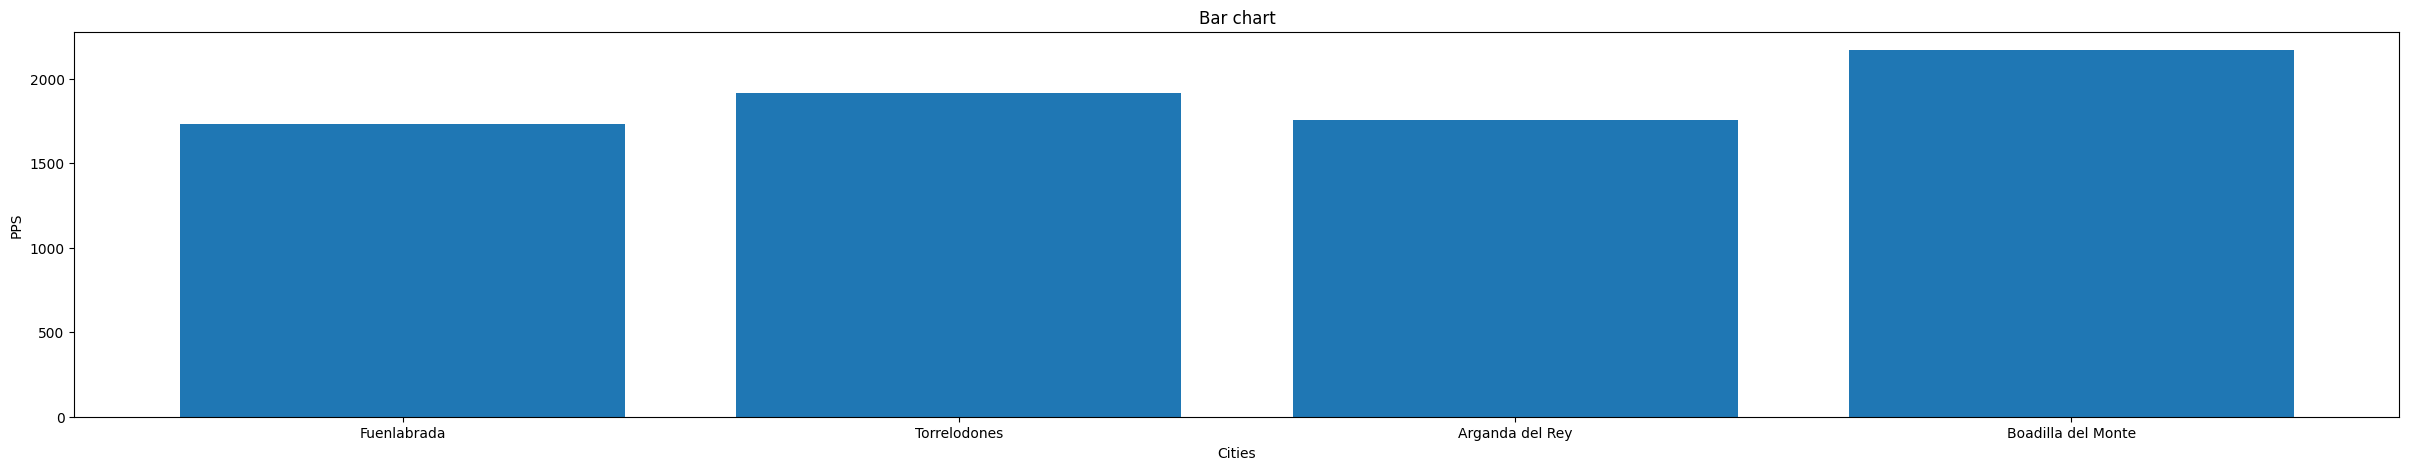

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

ds = pd.read_csv('assets/real_estate.csv', sep=';')
  
ds["pps"] = ds["price"] / ds["surface"]

city = ["Fuenlabrada", "Torrelodones", "Arganda del Rey", "Boadilla del Monte" ]
south_belt = ds[ds["level5"].isin(city)]

datam = south_belt[south_belt["level5"] == "Fuenlabrada"]
averm = datam["pps"].median()

datat = south_belt[south_belt["level5"] == "Torrelodones"]
avert = datat["pps"].median()

dataa = south_belt[south_belt["level5"] == "Arganda del Rey"]
avera = dataa["pps"].median()

datab = south_belt[south_belt["level5"] == "Boadilla del Monte"]
averb = datab["pps"].median()
print(avera)
print(ds["level5"])
 
labels = ["Fuenlabrada", "Torrelodones", "Arganda del Rey", "Boadilla del Monte" ]
print(type(averm))
values = [averm, avert, avera, averb]

plt.figure(figsize = (30, 5))

plt.xlabel('Cities')  
plt.ylabel('PPS') 
plt.bar(labels, values)
plt.title("Bar chart")

#### Exercise 21. Make a plot of the coordinates (latitude and longitude columns) of the south belt of Madrid by color of each population (you must use the subset obtained in Exercise 14) (★★★★)

Execute the following cell, and then start coding in the next one. You must implement a simple code that transforms the coordinates columns in a Python dictionary (add more information if needed) and then add it to the map

In [ ]:
from ipyleaflet import Map, basemaps, Marker, MarkerCluster, AwesomeIcon 

# Map centered on (60 degrees latitude and -2.2 degrees longitude)
# Latitude, longitude
map = Map(center = (60, -2.2), zoom = 2, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.OpenStreetMap.Mapnik)
map

Map(center=[60, -2.2], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [ ]:
## HERE: plot the coordinates of the estates

## PUT HERE YOUR CODE:

## this One was from a code received. I will study to make it again.
colors = ('red', 'blue', 'green', 'orange')
data = south_belt[south_belt['level5'].isin(("Fuenlabrada", "Leganés", "Getafe", "Alcorcón"))]
populations = data['level5'].unique()
markers = []
to_change = {
',': '.',
}

for population in populations:
    population_df = data[(data['level5'] == population) & (data['price'] > 0)]
    for index in range(len(population_df)):
        location = (population_df.iloc[index]['latitude'].replace(',', '.'),
            population_df.iloc[index]['longitude'].replace(',', '.'))
        indexes = np.where(populations == population)[0][0]
        color = colors[indexes]
        icon = AwesomeIcon(
            name='home',
            marker_color=color,
            icon_color='black',
            spin=False
            )
        marker = Marker(icon=icon, location=location)
        markers.append(marker)

marker_cluster = MarkerCluster(
    markers=markers
)

map.add_layer(marker_cluster)
map
#city = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón" ]
#south_belt = ds[ds["level5"].isin(city)]
#
#first = south_belt[south_belt["level5"] == "Fuenlabrada"]
#lat_fuen = first["latitude"]
#lon_fuen = first["longitude"]
#
#second = south_belt[south_belt["level5"] == "Leganés"]
#lat_lega = second["latitude"]
#lon_lega = second["longitude"]
#
#third = south_belt[south_belt["level5"] == "Getafe"]
#lat_geta = third["latitude"]
#lon_geta = third["longitude"]
#
#fourth = south_belt[south_belt["level5"] == "Alcorcón"]
#lat_alco = fourth["latitude"]
#lon_alco = fourth["longitude"]
#
#ds.columns

Map(center=[60, -2.2], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…